In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

from sklearn.cluster import KMeans, k_means
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# Folder
folder = './training/Final/'

file =  folder + 'dataset.csv'

%matplotlib inline

In [5]:
frame = pd.read_csv(file, sep='|')
frame.head()

,content,industries,location,title,type_empl,url,wage,suburb,experiences,title_left_over
0,Queensland Audit Office Investing in analytics...,Information & Communication Technology,Brisbane,DA,Permanent,https://www.seek.com.au/job/38867796?type=prom...,115000.0,CBD & Inner Suburbs,General,Analyst - Audit Analytics
1,Working for this market leader within the Fina...,Information & Communication Technology,Brisbane,DA,Permanent,https://www.seek.com.au/job/38986499?type=stan...,115000.0,CBD & Inner Suburbs,General,Head of Data Analytics & Performance
2,Queensland Audit Office Investing in analytics...,Information & Communication Technology,Brisbane,DA,Permanent,https://www.seek.com.au/job/39008462?type=stan...,115000.0,CBD & Inner Suburbs,General,Analyst - Audit Analytics
3,New Data Analyst opportunity with a well-known...,Information & Communication Technology,Brisbane,DA,Contract,https://www.seek.com.au/job/38942920?type=stan...,115000.0,CBD & Inner Suburbs,General,Data Analyst
4,Information Technology Services The Division o...,Information & Communication Technology,Brisbane,SDA,Permanent,https://www.seek.com.au/job/39005084?type=stan...,144000.0,Brisbane,Senior,Senior Business Analyst / Data Modeller


In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 10 columns):
content            1569 non-null object
industries         1569 non-null object
location           1569 non-null object
title              1569 non-null object
type_empl          1569 non-null object
url                1569 non-null object
wage               1569 non-null float64
suburb             1569 non-null object
experiences        1569 non-null object
title_left_over    1569 non-null object
dtypes: float64(1), object(9)
memory usage: 122.7+ KB


In [7]:
frame.drop(columns=['content','experiences','title_left_over','url','suburb'] ,axis=1, inplace=True)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 5 columns):
industries    1569 non-null object
location      1569 non-null object
title         1569 non-null object
type_empl     1569 non-null object
wage          1569 non-null float64
dtypes: float64(1), object(4)
memory usage: 61.4+ KB


In [8]:
frame['industries'].value_counts()

Information & Communication Technology    900
Banking & Financial Services              133
Accounting                                124
Marketing & Communications                106
Science & Technology                       72
Government & Defence                       59
Manufacturing, Transport & Logistics       53
Consulting & Strategy                      49
Sales                                      43
Insurance & Superannuation                 30
Name: industries, dtype: int64

In [9]:
frame

,industries,location,title,type_empl,wage
0,Information & Communication Technology,Brisbane,DA,Permanent,115000.0
1,Information & Communication Technology,Brisbane,DA,Permanent,115000.0
2,Information & Communication Technology,Brisbane,DA,Permanent,115000.0
3,Information & Communication Technology,Brisbane,DA,Contract,115000.0
4,Information & Communication Technology,Brisbane,SDA,Permanent,144000.0
5,Information & Communication Technology,Brisbane,DA,Contract,115000.0
6,Information & Communication Technology,Brisbane,DA,Permanent,115000.0
7,Information & Communication Technology,Brisbane,DA,Contract,115000.0
8,Information & Communication Technology,Brisbane,DA,Permanent,115000.0
9,Information & Communication Technology,Brisbane,DA,Contract,115000.0


In [10]:
# frame = frame[frame['wage'] > 10000]
# frame.info()

Text(0.5, 0.98, 'Distributions of content over the year')

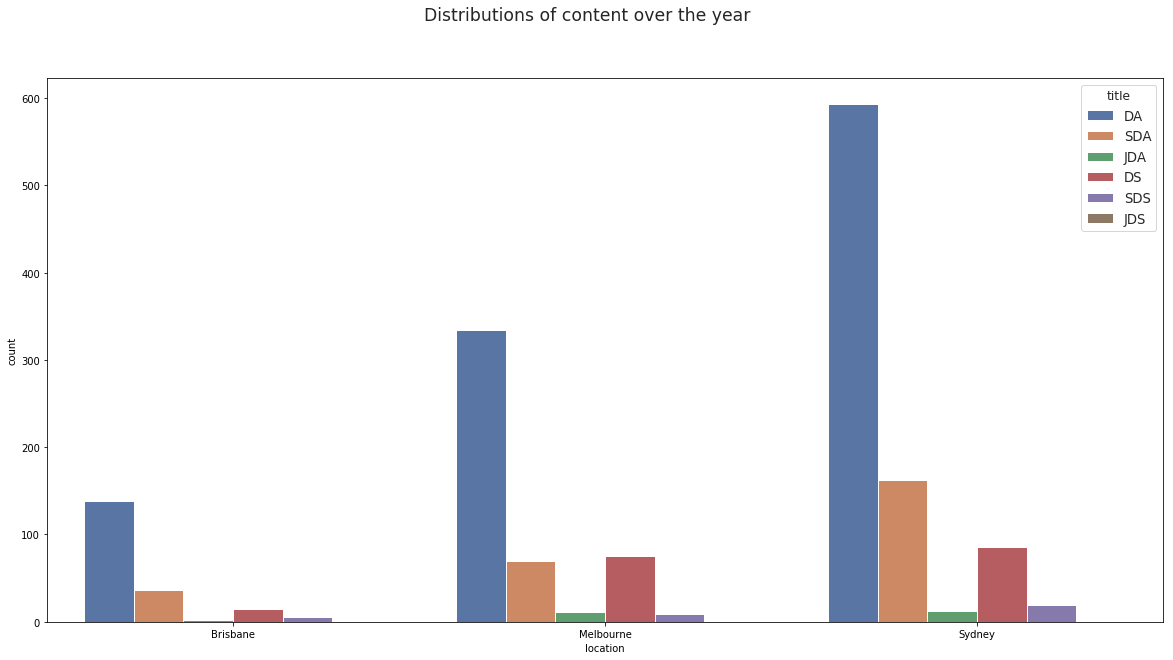

In [11]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.set(style="whitegrid", color_codes=True, font_scale=1.2)
# sns.countplot(x='year', data=df_datetime, orient='h')
sns.countplot(x='location',hue='title', data=frame, orient='h')
fig.suptitle('Distributions of content over the year')
# sns.barplot(x='title',y='wage',data=frame)

Text(0.5, 0.98, 'Length of text for each title')

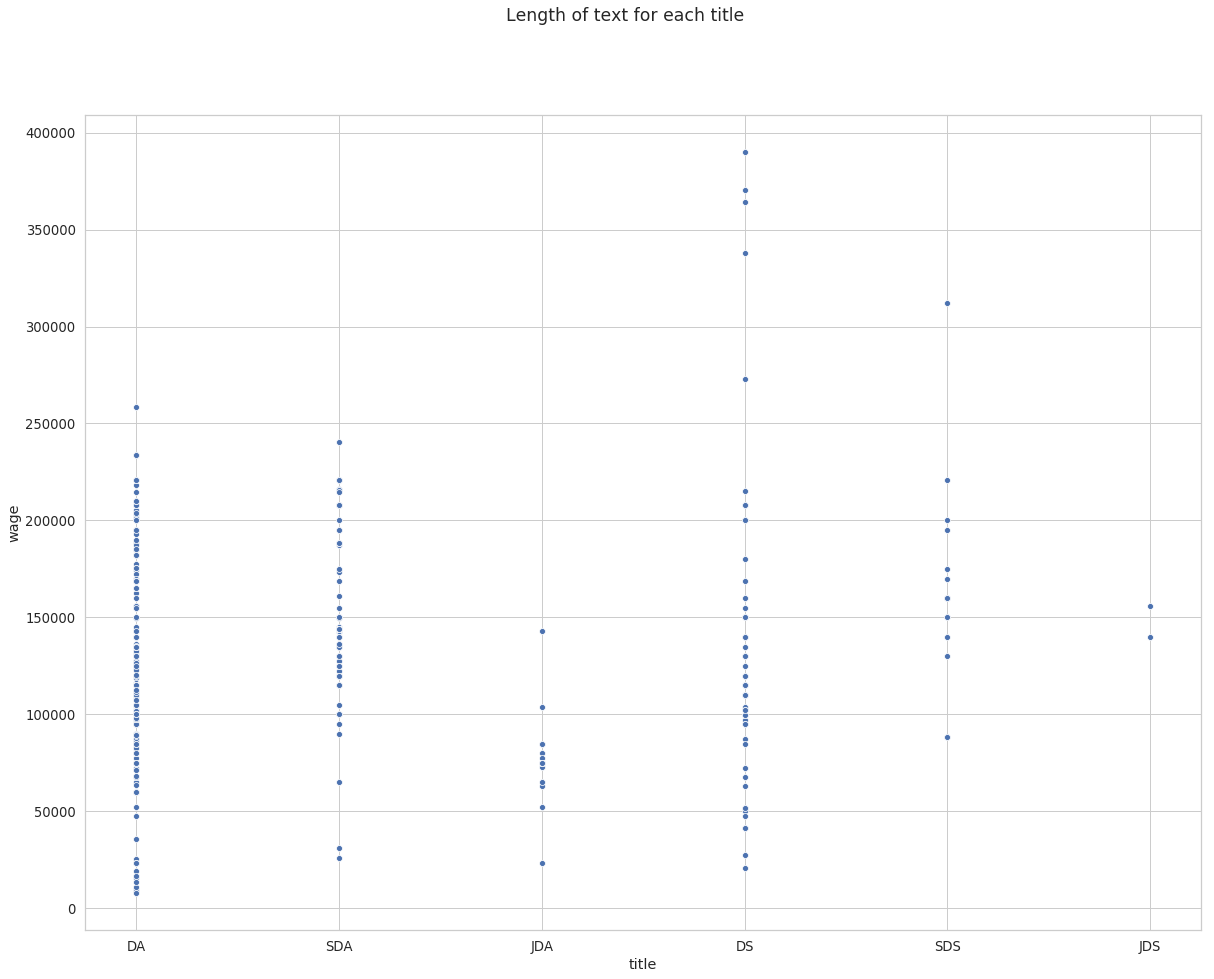

In [20]:
fig, ax = plt.subplots(1,1, figsize=(20,15))
sns.scatterplot(x='title' , y='wage', data=frame)
fig.suptitle('Length of text for each title')

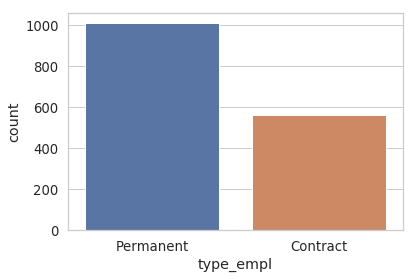

In [13]:
sns.countplot(x='type_empl',data=frame)

In [14]:
frame['type_empl'].value_counts(normalize=True).max()*100

64.308476736775

In [15]:
y = frame['wage'].values
df_dummies = frame.copy()
df_dummies.drop(labels=['wage'],axis=1,inplace=True)
X = pd.get_dummies(df_dummies, prefix=df_dummies.columns, columns=df_dummies.columns)

In [16]:
y_temp = pd.DataFrame(y,columns=['wage'])
df_temp = pd.concat([X,y_temp])
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 1568
Data columns (total 22 columns):
industries_Accounting                                1569 non-null float64
industries_Banking & Financial Services              1569 non-null float64
industries_Consulting & Strategy                     1569 non-null float64
industries_Government & Defence                      1569 non-null float64
industries_Information & Communication Technology    1569 non-null float64
industries_Insurance & Superannuation                1569 non-null float64
industries_Manufacturing, Transport & Logistics      1569 non-null float64
industries_Marketing & Communications                1569 non-null float64
industries_Sales                                     1569 non-null float64
industries_Science & Technology                      1569 non-null float64
location_Brisbane                                    1569 non-null float64
location_Melbourne                                   1569 non-null f

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 )
X_train.shape, X_test.shape

((1176, 21), (393, 21))

## 1. Linear

In [15]:
lm = LinearRegression()
lm_model = lm.fit(X_train,y_train)
m = lm_model.coef_[0]
b = lm_model.intercept_

print("formula: y = {}x + {}".format(m,b))

formula: y = -3.61125806291751e+16x + 8.861960979609317e+16


In [16]:
y_pred = lm_model.predict(X_test)
print("Our score: ", lm_model.score(X_test, y_test))
print("Variance score: ", r2_score(y_test, y_pred))
print("Mean square error: ",mean_squared_error(y_test, y_pred))

Our score:  0.1566314317937112
Variance score:  0.1566314317937112
Mean square error:  883985123.1424936


In [17]:
y_test.shape, y_pred.shape

((393,), (393,))

In [18]:
ss = StandardScaler()
Xs = ss.fit_transform(X.values)

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25 )
X_train.shape, X_test.shape

((1176, 21), (393, 21))

In [20]:
lm2 = LinearRegression()
lm2_model = lm.fit(X_train,y_train)
m = lm2_model.coef_[0]
b = lm2_model.intercept_

print("formula: y = {}x + {}".format(m,b))
y_pred = lm2_model.predict(X_test)
print("Our score: ", lm2_model.score(X_test, y_test))
print("Variance score: ", r2_score(y_test, y_pred))
print("Mean square error: ",mean_squared_error(y_test, y_pred))

formula: y = 9.37195592733297e+16x + 123022.56994047618
Our score:  0.2974599559982589
Variance score:  0.2974599559982589
Mean square error:  591944098.0285686


In [21]:
y_test.shape, y_pred.shape

((393,), (393,))

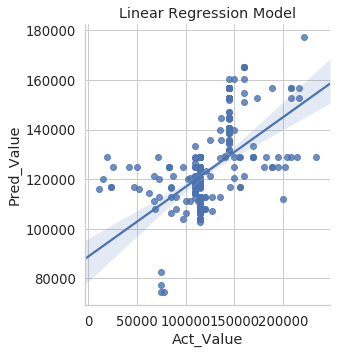

In [22]:
columns=['Act_Value','Pred_Value']
helper = pd.DataFrame([np.array(y_test),y_pred])
helper = helper.transpose()
helper.columns = columns

sns.lmplot(x='Act_Value', y='Pred_Value', data = helper);
ax = plt.gca()
ax.set_title("Linear Regression Model");


In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
logreg.score(X_test, y_test)

0.7633587786259542

In [ ]:
y_pred = logreg.predict(X_test)

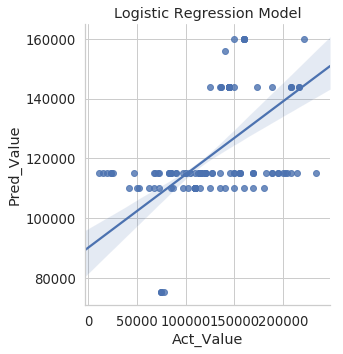

In [ ]:
columns=['Act_Value','Pred_Value']
helper = pd.DataFrame([np.array(y_test),y_pred])
helper = helper.transpose()
helper.columns = columns

sns.lmplot(x='Act_Value', y='Pred_Value', data = helper);
ax = plt.gca()
ax.set_title("Logistic Regression Model");

## 2. Classtification

In [18]:
### KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X_train)

# Baseline
print("Baseline: ",frame['title'].value_counts(normalize=True)*100)

knn6 = KNeighborsClassifier(n_neighbors=6, weights='uniform')

Baseline:  DA     67.877629
SDA    17.080943
DS     11.217336
SDS     2.103250
JDA     1.593372
JDS     0.127470
Name: title, dtype: float64


/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
skf = StratifiedKFold(n_splits=5)
cv_indices = skf.split(Xs, y)
cv_indices = [[tr,te] for tr,te in cv_indices]

ValueError: Found input variables with inconsistent numbers of samples: [1176, 1569]

In [27]:
# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, y, knn, cv_indices):
    
    # list to store the scores/accuracy of folds
    scores = []
    
    # iterate through the training and testing folds in cv_indices
    for train_i, test_i in cv_indices:
        
        # get the current X train & test subsets of X
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        # get the Y train & test subsets of Y
        Y_train = y[train_i]
        Y_test = y[test_i]

        # fit the knn model on the training data
        knn.fit(X_train, Y_train)
        
        # get the accuracy predicting the testing data
        acc = knn.score(X_test, Y_test)
        scores.append(acc)
        
        print(('Fold accuracy:', acc))
        
    print(('Mean CV accuracy:', np.mean(scores)))
    return scores


In [28]:
scores = accuracy_crossvalidator(Xs, y, knn6, cv_indices)

ValueError: Found input variables with inconsistent numbers of samples: [1176, 1569]

## 3. PCA & Clustering

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


[[0.00000000e+00 1.00000000e+00 0.00000000e+00 2.00000000e+00]
 [2.00000000e+00 1.56900000e+03 0.00000000e+00 3.00000000e+00]
 [6.00000000e+00 1.57000000e+03 0.00000000e+00 4.00000000e+00]
 ...
 [3.12900000e+03 3.13200000e+03 2.35695987e+01 5.87000000e+02]
 [3.12800000e+03 3.13300000e+03 2.95285677e+01 9.82000000e+02]
 [3.13400000e+03 3.13500000e+03 3.22290312e+01 1.56900000e+03]]


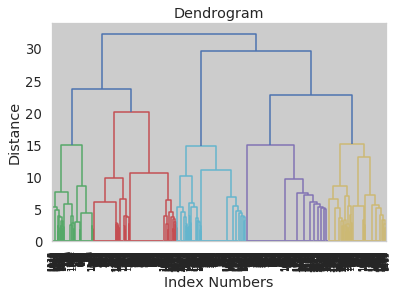

In [ ]:
## Dendograme
def plot_dendogram(df):
    
    # Data prep
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    print(Z)
    
    # plotting
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
    
plot_dendogram(X)

In [ ]:
sns.set_style("darkgrid")
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print(("Clusters represented at distance: ", set(clusters)))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

#     ax[0].scatter(X[:,0], X[:,6], c=clusters, cmap=cm.jet, s=40)

#     ax[0].set_title("Max Dist: %d" % max_dist)
    
#     # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
#     ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax.plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax.set_title('Dendrogram')
    ax.set_xlabel('Index Numbers')
    ax.set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
        #link_color_func=lambda color: cmaps['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

('Clusters represented at distance: ', {1, 2})
('Clusters represented at distance: ', {1, 2, 3, 4})
('Clusters represented at distance: ', {1, 2, 3, 4, 5, 6})


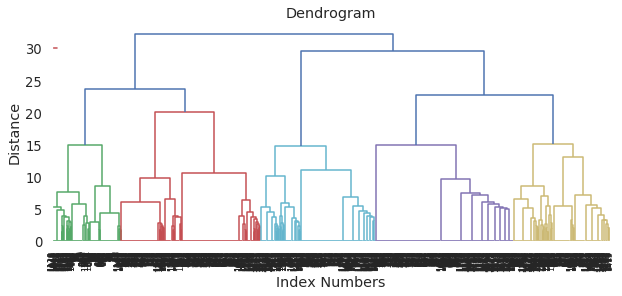

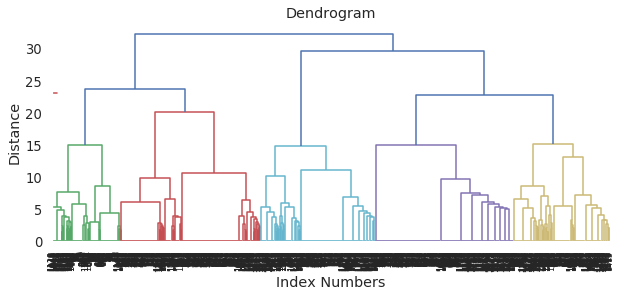

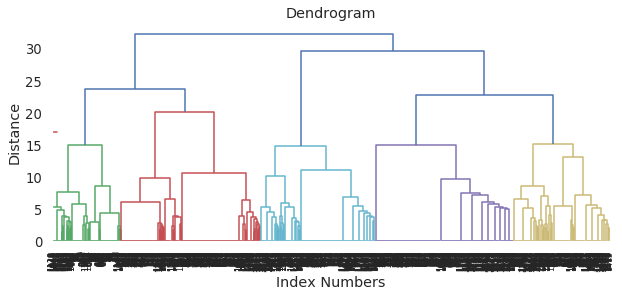

In [ ]:
Z = linkage(X, 'ward')
plot_dist_thresh(30)
plot_dist_thresh(23)
plot_dist_thresh(17)

In [ ]:
cluster_kmean = KMeans(n_clusters=6, random_state=0).fit(X)

predicted = cluster_kmean.labels_
centroids = cluster_kmean.cluster_centers_

print(("Predicted clusters to points: ", predicted))
print("Location of centroids: ")
print(centroids)

('Predicted clusters to points: ', array([1, 1, 1, ..., 2, 2, 2], dtype=int32))
Location of centroids: 
[[ 4.46428571e-02  4.46428571e-02  1.42857143e-02  2.50000000e-02
   7.91071429e-01  8.92857143e-03  1.60714286e-02  2.50000000e-02
   7.14285714e-03  2.32142857e-02  1.62500000e-01  3.12500000e-01
   5.25000000e-01  6.92857143e-01  6.96428571e-02  1.96428571e-02
   1.78571429e-03  2.01785714e-01  1.42857143e-02  1.00000000e+00
   5.32907052e-15]
 [ 1.13953488e-01  6.74418605e-02  2.79069767e-02  5.58139535e-02
   4.72093023e-01  6.97674419e-03  4.65116279e-02  9.30232558e-02
   4.41860465e-02  7.20930233e-02  2.46511628e-01  7.53488372e-01
   4.21884749e-15  6.76744186e-01  1.51162791e-01  1.86046512e-02
   2.32558140e-03  1.27906977e-01  2.32558140e-02  2.44249065e-15
   1.00000000e+00]
 [ 8.63557858e-02  1.36442142e-01  5.00863558e-02  3.62694301e-02
   4.38687392e-01  3.79965458e-02  4.14507772e-02  8.98100173e-02
   3.45423143e-02  4.83592401e-02 -5.55111512e-16  2.66453526e-15


## Ensemble methods & Decision Tree Models

In [ ]:
## DecisionTree
dt = DecisionTreeClassifier()

cross_val_score(dt, X_train, y_train, cv=5).mean()

/home/shayne/Anaconda3/envs/caps_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.7383747251096879

In [ ]:
dt.fit(X_train, y_train)
dt.score(X_train,y_train)

0.7517006802721088

In [ ]:
dt.score(X_test, y_test)

0.7302798982188295

In [ ]:
## BaggingClassifier
bag = BaggingClassifier(n_estimators=10000)

bag.fit(X_train, y_train)
bag.score(X_train, y_train)

0.7517006802721088

In [ ]:
bag.score(X_test, y_test)

In [ ]:
## RandomforestClassication
rfc = RandomForestClassifier(n_estimators=10000)

rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

In [ ]:
rfc.score(X_test, y_test)

In [ ]:
## ExtraTrees Classification
et = ExtraTreesClassifier(n_estimators=10000)

et.fit(X_train, y_train)
et.score(X_train, y_train)

In [ ]:
et.score(X_test, y_test)

## SVM

In [ ]:
def plot_svm(clf):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))

    # create grid to evaluate model
    xy = np.vstack([xx2.ravel(), yy2.ravel()]).T
    Z = clf.decision_function(xy).reshape(xx2.shape)

    # plot decision boundary and margins
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.binary, alpha=0.2)
    ax.contour(xx2, yy2, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if not isinstance(clf, LinearSVC):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
               linewidth=1, facecolors='none', edgecolors='k')
        print (clf.support_vectors_)
        
    plt.show()
    

In [ ]:
fsd=

In [ ]:
def plot_svm(clf):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))

    # create grid to evaluate model
    xy = np.vstack([xx2.ravel(), yy2.ravel()]).T
    Z = clf.decision_function(xy).reshape(xx2.shape)

    # plot decision boundary and margins
    ax.contourf(xx2, yy2, Z, cmap=plt.cm.binary, alpha=0.2)
    ax.contour(xx2, yy2, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
               linestyles=['--', '-', '--'])
    # plot support vectors
    if not isinstance(clf, LinearSVC):
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
               linewidth=1, facecolors='none', edgecolors='k')
        print (clf.support_vectors_)
        
    plt.show()
    

In [ ]:
sv = SVC(kernel='linear', C=10000)
sv.fit(X, y)
plot_svm(sv)

In [ ]:
clf_poly = SVC(kernel='poly', degree=3, C=10000)
clf_poly.fit(X, y)
plot_svm(clf_poly)